# Oracle DB와 python 연동

In [1]:
import cx_Oracle

#한글 지원 방법
import os
os.putenv('NLS_LANG', '.UTF8')

#연결에 필요한 기본 정보(유저, 비밀번호, 데이터베이스 서버 주소)

connection = cx_Oracle.connect('scott/tiger@localhost:1521/xe')
#connection = cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor = connection.cursor()

sql = "select * from tbl_friend"
#sql = "select * from myai4"


# Update query
#sql = "update tbl_friend set f_addr='서울', f_age=50 where f_num=3"

cursor.execute(sql)

for row in cursor:
    for i in range(len(row)):
        print(row[i], end = ' ')
    print()
    
cursor.close()
connection.close

2 김건희 010-1111-1111 서울 50 
3 임초록 010-1111-1111 광주 28 
20 나길동 010-4564-7682 광주 24 
100 김건희 010- 서울 29 


<function Connection.close>

# Web Crawling

In [2]:
import urllib.request
from bs4 import BeautifulSoup

num = 0
s = []
lst = []

for i in range(200):
    num += 1
    url = f"http://www.11st.co.kr/browsing/OpenContReviewAction.tmall?method=getProductReviewList&prdNo=1515610822&page={num}&pageSize=10&reviewDispYn=Y&dispCtgrNo=&prdEvlPnt=&buyGrdCd=&reviewType=&searchText=&pageListStr=&isPreview=&reviewOptDispYn=&optSearchBtnAndGraphLayer=&reviewBottomBtn=&openDetailContents=&orderCondition=R&searchType=01&evtCd="

    html = urllib.request.urlopen(url).read()

    soup = BeautifulSoup(html, "html.parser") 

    all_divs = soup.find_all("a", {"id":"goReviewDetail"})
    all_stars = soup.find_all("span", 'ico_rev_star')
    
    for j in range(5):
        a = all_divs[j].text.strip()
        if a:
            s.append(a)
            lst.append(int(soup.find_all("span", 'ico_rev_star')[j]['class'][1][-1]))
        
        else:
            continue

print(s[:5])
print(lst[:5])

['딱 원했던 스탈에 깔끔하니 좋네요~가성비 좋은 제품 강추입니다~^^', '늘 이것만신어요 저렴하고조음', '일단 편하게 부담없이 신을수 있는 양말이 필요했는 이 제품이 딱 이더라구요. 저렴한 가격에 10켤레 여서 좋습니다. 신다가 한쪽이 구멍나더라도 같은색이라서 하나만 교체하여 신으', '좋네요 ㅎㅎ', '딱 좋아요 쫀쫀함도 적당하고 잘 신을것같습니다']
[5, 4, 5, 5, 5]


In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"Review" : s, "Score" : lst})
df.head(10)

,Review,Score
0,딱 원했던 스탈에 깔끔하니 좋네요~가성비 좋은 제품 강추입니다~^^,5
1,늘 이것만신어요 저렴하고조음,4
2,일단 편하게 부담없이 신을수 있는 양말이 필요했는 이 제품이 딱 이더라구요. 저렴한...,5
3,좋네요 ㅎㅎ,5
4,딱 좋아요 쫀쫀함도 적당하고 잘 신을것같습니다,5
5,육안으로는 생각보다 튼튼해보이지는 않는데신어보면 알것같아요!,4
6,기본무지 단목이에요. 신으면 복숭아뼈위 3~5cm 정도 됩니다. 남자인데 발 사이즈...,5
7,남성용 발목양말 무난합니다 고무부분도 적당해요 배송은 완전빨라요,4
8,무늬도 맘에 들고 재질도 괜찮아요~ 사실 남자들 발목 양말은 금방 목이 늘어나서 안...,5
9,가성비 좋네요. 막 신기 좋을 듯 합니다. 알하고 나눠 씁니다.,5


In [11]:
df['Score'].describe()

count    611.000000
mean       4.528642
std        0.753406
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Score, dtype: float64

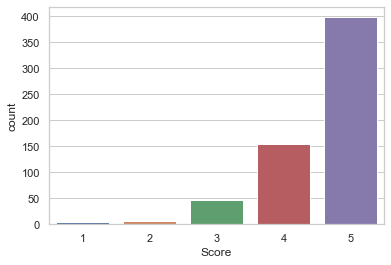

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(df['Score'])

# 자연어 처리(명사 추출, POS tagging)

In [13]:
corpus = df['Review'].tolist()

In [14]:
from konlpy.tag import Kkma

kkma = Kkma()
print(kkma.sentences(corpus[0]))
print()
print(kkma.nouns(corpus[0]))
print()
print(kkma.pos(corpus[0]))

['딱 원했던 스탈에 깔끔하니 좋네요~', '가성 비 좋은 제품 강추입니다~', '^^']

['스탈', '가성', '가성비', '비', '제품', '강추']

[('딱', 'MAG'), ('원하', 'VV'), ('었', 'EPT'), ('더', 'EPT'), ('ㄴ', 'ETD'), ('스탈', 'NNG'), ('에', 'JKM'), ('깔끔', 'XR'), ('하', 'XSA'), ('니', 'ECD'), ('좋', 'VA'), ('네요', 'EFN'), ('~', 'SO'), ('가성', 'NNG'), ('비', 'NNG'), ('좋', 'VA'), ('은', 'ETD'), ('제품', 'NNG'), ('강추', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('~', 'SO'), ('^^', 'EMO')]


# stopwords list 불러오기

In [15]:
stopword_list = pd.read_csv("stopwords.txt",header=None)[0].tolist()

# 문서 단어 행렬(Document-Term Matrix, DTM)의 표기

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = stopword_list)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names()[:5])
print(X.toarray()[:5])

['1000에', '10개짜리는', '10장이라서', '10족같은색으로샀는데', '10컬레']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 워드 클라우드

(-0.5, 999.5, 299.5, -0.5)

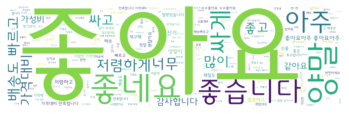

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = " ".join(corpus)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     width = 1000,
                     height = 300,
                     ).generate(text)

# Display the generated image:
# the matplotlib way:

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('C:/Users/SM129/0708_python/wordcloud_ex1.svg')

# 리뷰점수에 따른 word별 긍부정 check

In [20]:
R = X.toarray()
print(R.shape)

R_df = pd.DataFrame(R)

(611, 1561)


In [21]:
R_df.columns = vectorizer.get_feature_names()
R_df

,1000에,10개짜리는,10장이라서,10족같은색으로샀는데,10컬레,10컬레를,10켤레,1개,1년넘게쓰는중,1년이상,...,흰색은,흰색이,흰색이네영,흰색이네요,흰양말,흰양말만,흰양말샀는데,흰양말을시켯는데,힘들어서,힘들어요
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [22]:
test = np.zeros(R_df.shape)

num_word = R_df[R_df == test].fillna(1).sum(axis=0)
n_W = sum(num_word)
print(n_W)
print(num_word)

2964.0
1000에          1.0
10개짜리는         1.0
10장이라서         1.0
10족같은색으로샀는데    1.0
10컬레           1.0
              ... 
흰양말만           3.0
흰양말샀는데         1.0
흰양말을시켯는데       1.0
힘들어서           1.0
힘들어요           1.0
Length: 1561, dtype: float64


# T-statistic을 활용한 corpus-based sentiment analysis

In [25]:
from scipy import stats

R = R * np.array(df['Score']).reshape(-1,1)
E_W = R.sum() / n_W
S_W = ((R - E_W)**2/(n_W-1)).sum()

T_w = []

alpha = 0.999

for i in range(len(R[0])):
    R_t = np.array(list(R[:i]) + list(R[i+1:]))
    n_w = n_W - num_word[i]
    E_w = R_t.sum() / n_w
    S_w = ((R_t - E_w)**2/(n_w-1)).sum()
    t = (E_W - E_w) / np.sqrt(S_W/n_W + S_w/n_w)
    v = (S_W/n_W + S_w/n_w)**2 / ((S_W/n_W)**2/(n_W-1) + (S_w/n_w)**2/(n_w-1))
    val = stats.t.cdf(t, v)
    
    if alpha/2 < val < 1-alpha/2:
        T_w.append(["Neutral", t])
    elif val < alpha/2:
        T_w.append(["Negative", t])
    else:
        T_w.append(["Positive", t])
    
T_w[:10]

[['Positive', 0.005980456584444281],
 ['Neutral', 0.0003464727642391155],
 ['Positive', 0.01607777344233702],
 ['Neutral', 0.0009494107041740979],
 ['Positive', 0.0026251233707235335],
 ['Positive', 0.001954681271296202],
 ['Positive', 0.013051608415303789],
 ['Positive', 0.0030274864617000387],
 ['Positive', 0.020298881040805215],
 ['Positive', 0.005980456584444281]]

In [26]:
# 부정 단어 20개 나열

idx = pd.DataFrame(T_w).sort_values(1).index
sorted_T_w = np.array(pd.DataFrame(T_w).sort_values(1))
sorted_word_lst = np.array(vectorizer.get_feature_names())[idx].reshape(-1,1)
result = np.concatenate([sorted_T_w, sorted_word_lst], axis=1)
result = pd.DataFrame(result)
result.columns = ['긍부정', 'T', '단어']

result.head(10)

,긍부정,T,단어
0,Negative,-0.078883,좋아요
1,Negative,-0.0224634,양말
2,Negative,-0.0224634,빠르고
3,Negative,-0.0224634,좋네요
4,Negative,-0.0212737,배송도
5,Negative,-0.0212151,가격대비
6,Negative,-0.0210144,좋습니다
7,Negative,-0.0173918,아주
8,Negative,-0.015218,저렴하게
9,Negative,-0.015218,싸게


In [155]:
# 중립 단어 20개 나열

result.loc[500:519,:]

,긍부정,T,단어
500,Neutral,-0.000351571,싫어서
501,Neutral,-0.000351571,알듯
502,Neutral,-0.000351571,이만하면
503,Neutral,-0.000351571,알았는데
504,Neutral,-0.000351571,이쁘네요
505,Neutral,-0.000351571,인데
506,Neutral,-0.000351571,이가격에
507,Neutral,-0.000204102,ㅎㅎ
508,Neutral,-0.000204102,괜찮아요
509,Neutral,-0.000196186,가벼운


In [27]:
# 긍정 단어 20개 나열
result.tail(20)

,긍부정,T,단어
1541,Positive,0.0127068,괜찮아보입니다
1542,Positive,0.0127068,다니는
1543,Positive,0.0127068,많은양
1544,Positive,0.0130516,10켤레
1545,Positive,0.0143916,1년정도가
1546,Positive,0.0143916,구입해봤습니다
1547,Positive,0.0143923,덧신인줄알앗는데
1548,Positive,0.0145069,구입했어요
1549,Positive,0.015236,물건이
1550,Positive,0.0160778,10장이라서


In [28]:
# 긍정

a = np.array(vectorizer.get_feature_names())[idx[:20]]
b = X.toarray().sum(axis = 0)[idx[:20]]
ans_pos = ""
for i in range(20):
    for j in range(int(b[i])):
        ans_pos = ans_pos + " " + a[i]
        
lst = np.array(ans_pos.split())
idxx = list(range(len(lst)))

np.random.shuffle(idxx)
ans_pos = " ".join(lst[idxx])


# 부정

a = np.array(vectorizer.get_feature_names())[idx[-20:]]
b = X.toarray().sum(axis = 0)[idx[-20:]]
ans_neg = ""
for i in range(20):
    for j in range(int(b[i])):
        ans_neg = ans_neg + " " + a[i]

lst = np.array(ans_neg.split())
idxx = list(range(len(lst)))

np.random.shuffle(idxx)
ans_neg = " ".join(lst[idxx])

        
ans_neg

'1년정도가 구입했어요 10켤레 무료배송이라 맘에들어해서 날것 10켤레 델만큼 다니는 그대로의 1년전 10켤레 괜찮아보입니다 구입했어요 그닥 1년지나면 무료배송이라 구입해봤습니다 덧신인줄알앗는데 1년넘게쓰는중 많은양 물건이 10켤레 구멍이났어요 10장이라서 10켤레'

In [29]:
lst = np.array(ans_pos.split())
idx = list(range(len(lst)))

np.random.shuffle(idx)
ans_pos = " ".join(lst[idx])

<Figure size 432x288 with 0 Axes>

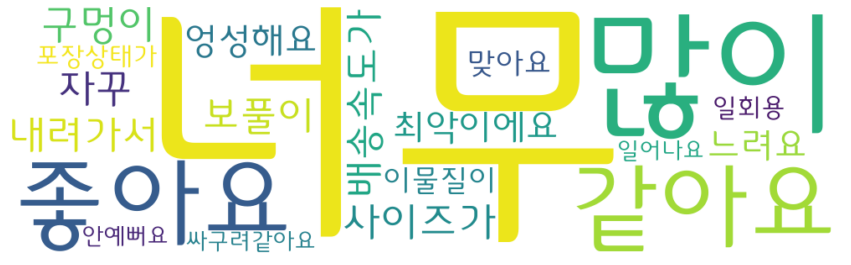

In [144]:
# negative wordcloud
wordcloud_pos = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     
                    width = 1000,
                     height = 300,
                     ).generate(ans_pos)

fig = plt.figure()
plt.figure(figsize=(15,12))
plt.tight_layout(pad=0)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.savefig('image_pos.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

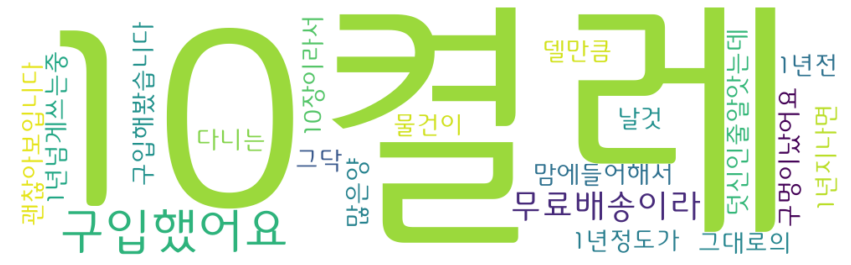

In [30]:
# positive wordcloud
wordcloud_neg = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     
                    width = 1000,
                     height = 300,
                     ).generate(ans_neg)

fig = plt.figure()
plt.figure(figsize=(15,12))
plt.tight_layout(pad=0)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.savefig('image_neg.png', bbox_inches='tight')